In [7]:
import pandas as pd
import numpy as np

In [8]:
import os

In [9]:
os.getcwd()

'C:\\Users\\yoges\\OneDrive\\skill4f'

In [10]:
os.chdir("C:\\Users\\yoges\\OneDrive\\skill4f")

In [12]:
data=pd.read_csv("orders.csv")

In [13]:
data.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [14]:
data.tail()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian
9999,10000,457,439,21-10-2023,879.58,Classic Cafe Family Restaurant


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   user_id          10000 non-null  int64  
 2   restaurant_id    10000 non-null  int64  
 3   order_date       10000 non-null  object 
 4   total_amount     10000 non-null  float64
 5   restaurant_name  10000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


In [16]:
data.describe()

,order_id,user_id,restaurant_id,total_amount
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1504.117700,251.016700,801.162412
std,2886.89568,861.727776,144.622558,405.458753
min,1.00000,1.000000,1.000000,100.200000
25%,2500.75000,761.000000,127.000000,446.310000
50%,5000.50000,1508.000000,251.000000,806.295000
75%,7500.25000,2250.250000,376.000000,1149.227500
max,10000.00000,3000.000000,500.000000,1499.830000


In [17]:
data.size

60000

In [18]:
data.shape

(10000, 6)

In [19]:
data.ndim

2

In [20]:
data.isna()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [21]:
data.isna().any()

order_id           False
user_id            False
restaurant_id      False
order_date         False
total_amount       False
restaurant_name    False
dtype: bool

In [22]:
import json

In [54]:
with open("users.json","r") as f:
    yo=json.load(f)
yo    

[{'user_id': 1, 'name': 'User_1', 'city': 'Chennai', 'membership': 'Regular'},
 {'user_id': 2, 'name': 'User_2', 'city': 'Pune', 'membership': 'Gold'},
 {'user_id': 3, 'name': 'User_3', 'city': 'Bangalore', 'membership': 'Gold'},
 {'user_id': 4,
  'name': 'User_4',
  'city': 'Bangalore',
  'membership': 'Regular'},
 {'user_id': 5, 'name': 'User_5', 'city': 'Pune', 'membership': 'Gold'},
 {'user_id': 6, 'name': 'User_6', 'city': 'Pune', 'membership': 'Gold'},
 {'user_id': 7, 'name': 'User_7', 'city': 'Chennai', 'membership': 'Gold'},
 {'user_id': 8,
  'name': 'User_8',
  'city': 'Hyderabad',
  'membership': 'Regular'},
 {'user_id': 9, 'name': 'User_9', 'city': 'Bangalore', 'membership': 'Gold'},
 {'user_id': 10,
  'name': 'User_10',
  'city': 'Chennai',
  'membership': 'Regular'},
 {'user_id': 11, 'name': 'User_11', 'city': 'Chennai', 'membership': 'Gold'},
 {'user_id': 12, 'name': 'User_12', 'city': 'Pune', 'membership': 'Regular'},
 {'user_id': 13, 'name': 'User_13', 'city': 'Chennai'

In [55]:
import sqlite3

In [56]:
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Read and execute SQL file
with open("restaurants.sql", "r") as file:
    sql_script = file.read()
cursor.executescript(sql_script)

# Load restaurants table and DataFrame
restaurants_df = pd.read_sql_query(
    "SELECT * FROM restaurants",
    conn
)


In [57]:
restaurants_df.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [61]:
# Merge orders with users (LEFT JOIN)
data = pd.read_csv("orders.csv")
yo = pd.read_json("users.json")

data_yo = data.merge(
    yo,
    on="user_id",
    how="left"
)


In [62]:
print(type(data))
print(type(yo))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [68]:
final_data = data_yo.merge(
    restaurants_df,
    on="restaurant_id",
    how="left"
)


In [69]:
who = globals()
"data_users" in who


False

In [70]:
final_data.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [72]:
data.columns
yo.columns
restaurants_df.columns


Index(['restaurant_id', 'restaurant_name', 'cuisine', 'rating'], dtype='object')

In [73]:
final_data.head()
final_data.columns


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [74]:
final_data.to_csv("final_food_delivery_dataset.csv", index=False)


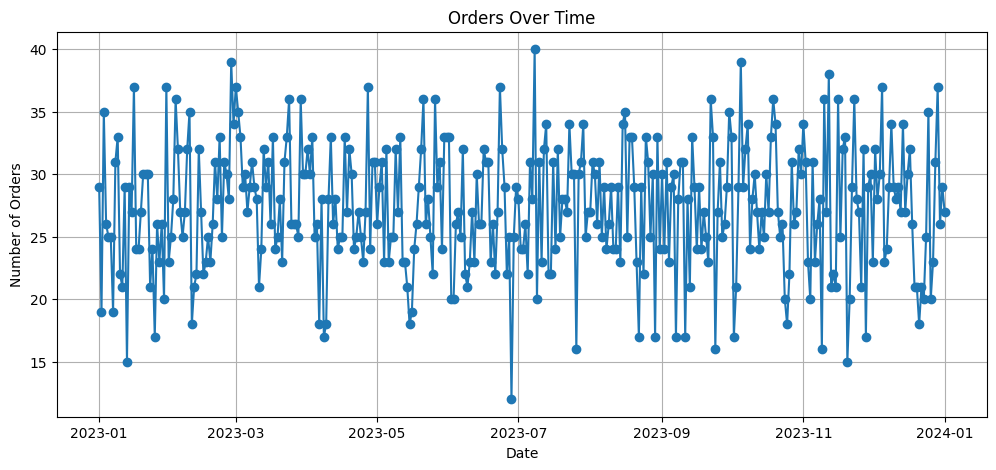

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure order_date column is datetime
final_data['order_date'] = pd.to_datetime(final_data['order_date'])

# Orders per day
orders_per_day = final_data.groupby(final_data['order_date'].dt.date)['order_id'].count()

# Plot
plt.figure(figsize=(12,5))
orders_per_day.plot(kind='line', marker='o')
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


In [88]:
# Check all column names in your merged dataset
print(final_data.columns)


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating', 'month'],
      dtype='object')


In [91]:
# Total orders per user
user_orders = final_data.groupby('user_id')['order_id'].count().sort_values(ascending=False)
print("Top 5 users by number of orders:")
print(user_orders.head())

# Total revenue per user
user_revenue = final_data.groupby('user_id')['total_amount'].sum().sort_values(ascending=False)
print("\nTop 5 users by revenue:")
print(user_revenue.head())

# Average order per membership type
final_data.groupby('membership')['total_amount'].mean()


Top 5 users by number of orders:
user_id
2973    13
1515    12
496     11
874     11
1337    11
Name: order_id, dtype: int64

Top 5 users by revenue:
user_id
1515    11556.49
650     10747.44
496      9634.30
2586     9486.61
2615     9237.32
Name: total_amount, dtype: float64


membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64

In [93]:
# Orders per city
city_orders = final_data.groupby('city')['order_id'].count().sort_values(ascending=False)
print("Orders per city:")
print(city_orders)

# Orders per cuisine
cuisine_orders = final_data.groupby('cuisine')['order_id'].count().sort_values(ascending=False)
print("\nOrders per cuisine:")
print(cuisine_orders)


Orders per city:
city
Bangalore    2751
Chennai      2469
Pune         2430
Hyderabad    2350
Name: order_id, dtype: int64

Orders per cuisine:
cuisine
Mexican    2581
Italian    2532
Indian     2469
Chinese    2418
Name: order_id, dtype: int64


Membership impact (Gold vs Regular):
            count        mean         sum
membership                               
Gold         4987  797.145556  3975364.89
Regular      5013  805.158434  4036259.23


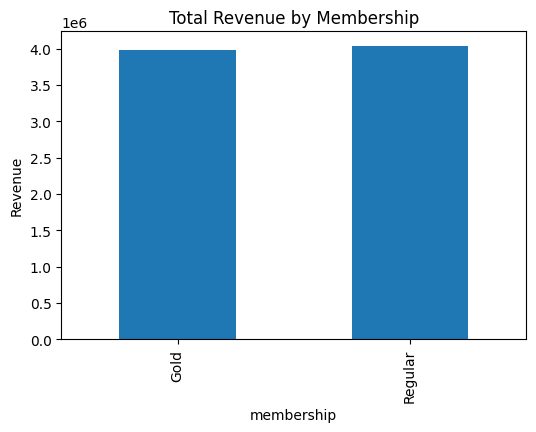

In [96]:
membership_summary = final_data.groupby('membership')['total_amount'].agg(['count','mean','sum'])
print("Membership impact (Gold vs Regular):")
print(membership_summary)

# Optional: Plot revenue by membership
membership_summary['sum'].plot(kind='bar', figsize=(6,4), title='Total Revenue by Membership')
plt.ylabel('Revenue')
plt.show()


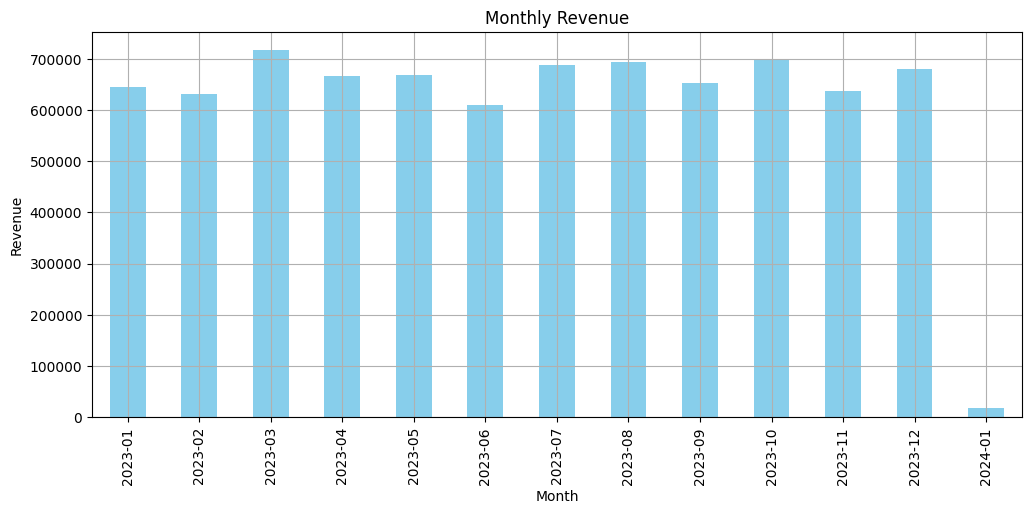

In [98]:
# Revenue per month
final_data['month'] = final_data['order_date'].dt.to_period('M')
revenue_per_month = final_data.groupby('month')['total_amount'].sum()

# Plot
plt.figure(figsize=(12,5))
revenue_per_month.plot(kind='bar', color='skyblue')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


In [101]:
gold_revenue_city = final_data[final_data['membership'] == 'Gold'] \
                    .groupby('city')['total_amount'].sum() \
                    .sort_values(ascending=False)
print("City with highest revenue from Gold members:")
print(gold_revenue_city)


City with highest revenue from Gold members:
city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64


In [104]:
avg_order_cuisine = final_data.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)
print("Cuisine with highest average order value:")
print(avg_order_cuisine)


Cuisine with highest average order value:
cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64


In [106]:
user_total_amount = final_data.groupby('user_id')['total_amount'].sum()
count_users_1000 = user_total_amount[user_total_amount > 1000].count()
print("Distinct users with total orders > ₹1000:", count_users_1000)


Distinct users with total orders > ₹1000: 2544


In [121]:
final_data['quarter'] = final_data['order_date'].dt.quarter
revenue_by_quarter = final_data.groupby('quarter')['total_amount'].sum().sort_values(ascending=False)
print("\nQuarter with highest revenue:\n", revenue_by_quarter)


Quarter with highest revenue:
 quarter
3    2037385.10
4    2018263.66
1    2010626.64
2    1945348.72
Name: total_amount, dtype: float64


In [127]:
restaurant_stats = final_data.groupby('restaurant_name_x').agg(
    avg_order=('total_amount', 'mean'),
    total_orders=('order_id', 'count')
)
top_restaurant = restaurant_stats[restaurant_stats['total_orders'] < 20].sort_values(by='avg_order', ascending=False)
print("\nRestaurant with highest avg order (<20 orders):\n", top_restaurant.head(1))



Restaurant with highest avg order (<20 orders):
                             avg_order  total_orders
restaurant_name_x                                  
Hotel Dhaba Multicuisine  1040.222308            13


In [128]:
cuisine_stats = final_data.groupby('cuisine').agg(
    distinct_restaurants=('restaurant_id', 'nunique'),
    total_revenue=('total_amount', 'sum')
).sort_values(by=['distinct_restaurants','total_revenue'])
print("\nCuisine with few restaurants but high revenue:\n", cuisine_stats)


Cuisine with few restaurants but high revenue:
          distinct_restaurants  total_revenue
cuisine                                     
Chinese                   120     1930504.65
Indian                    126     1971412.58
Italian                   126     2024203.80
Mexican                   128     2085503.09


In [129]:
gold_avg_city = final_data[final_data['membership'] == 'Gold'].groupby('city')['total_amount'].mean().sort_values(ascending=False)
print("\nCity with highest avg order value among Gold members:\n", gold_avg_city)


City with highest avg order value among Gold members:
 city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64


In [134]:
# Group by membership + cuisine and sum revenue
combo_revenue = final_data.groupby(['membership', 'cuisine'])['total_amount'].sum().sort_values(ascending=False)

print("Top membership + cuisine combinations by revenue:")
print(combo_revenue.head(5))




Top membership + cuisine combinations by revenue:
membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Name: total_amount, dtype: float64


In [136]:
# Filter orders for Gold members
gold_orders = final_data[final_data['membership'] == 'Gold']

# Count total orders
total_gold_orders = gold_orders['order_id'].count()

print("Total orders placed by Gold members:", total_gold_orders)


Total orders placed by Gold members: 4987


In [137]:
# Filter orders from Hyderabad
hyderabad_orders = final_data[final_data['city'] == 'Hyderabad']

# Sum total revenue and round
total_revenue_hyderabad = round(hyderabad_orders['total_amount'].sum())

print("Total revenue from Hyderabad orders:", total_revenue_hyderabad)


Total revenue from Hyderabad orders: 1889367


In [138]:
# Count distinct users
distinct_users = final_data['user_id'].nunique()

print("Number of distinct users who placed at least one order:", distinct_users)


Number of distinct users who placed at least one order: 2883


In [139]:
# Filter for Gold members
gold_orders = final_data[final_data['membership'] == 'Gold']

# Calculate average order value
avg_order_value_gold = round(gold_orders['total_amount'].mean(), 2)

print("Average order value for Gold members:", avg_order_value_gold)


Average order value for Gold members: 797.15


In [146]:
# Filter orders for restaurants with rating >= 4.5
high_rating_orders = final_data[final_data['rating'] >= 4.5]

# Count total orders
total_high_rating_orders = high_rating_orders['order_id'].count()

print("Total orders for restaurants with rating >= 4.5:", total_high_rating_orders)


Total orders for restaurants with rating >= 4.5: 0


In [144]:
# Step 1: Find the top revenue city among Gold members
gold_data = final_data[final_data['membership'] == 'Gold']
top_city = gold_data.groupby('city')['total_amount'].sum().idxmax()  # city with highest revenue

# Step 2: Count orders in that city for Gold members
orders_top_city_gold = gold_data[gold_data['city'] == top_city]['order_id'].count()

print("Top revenue city among Gold members:", top_city)
print("Number of orders in that city by Gold members:", orders_top_city_gold)


Top revenue city among Gold members: Chennai
Number of orders in that city by Gold members: 1337


In [145]:
import pandas as pd

# Load orders.csv
orders = pd.read_csv("orders.csv")

# Load users.json
users = pd.read_json("users.json")

# Merge orders with users on user_id (Left Join)
orders_users = orders.merge(users, on="user_id", how="left")

# Preview the merged dataset
orders_users.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


In [147]:
import sqlite3
import pandas as pd

# Step 1: Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Step 2: Read the SQL file and execute it to create tables
with open('restaurants.sql', 'r') as f:
    sql_script = f.read()

conn.executescript(sql_script)

# Step 3: Load the restaurants table into a DataFrame
restaurants = pd.read_sql_query("SELECT * FROM restaurants;", conn)

# Step 4: Preview the data
print(restaurants.head())


   restaurant_id restaurant_name  cuisine  rating
0              1    Restaurant_1  Chinese     4.8
1              2    Restaurant_2   Indian     4.1
2              3    Restaurant_3  Mexican     4.3
3              4    Restaurant_4  Chinese     4.1
4              5    Restaurant_5  Chinese     4.8


In [148]:
# Assuming final_data is your merged dataset
total_rows = final_data.shape[0]
print("Total number of rows in final merged dataset:", total_rows)


Total number of rows in final merged dataset: 10000


In [149]:
# Suppose orders_users is your merged DataFrame
orders_users[orders_users['name'].isna()]



,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership


In [150]:
final_data = orders.merge(users, on='user_id', how='left')


In [151]:
final_data

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular
...,...,...,...,...,...,...,...,...,...
9995,9996,2528,249,21-05-2023,1211.96,Royal Kitchen North Indian,User_2528,Hyderabad,Gold
9996,9997,2867,267,06-08-2023,1188.05,Darbar Cafe Punjabi,User_2867,Bangalore,Regular
9997,9998,522,420,11-11-2023,979.44,Ruchi Tiffins Chinese,User_522,Bangalore,Gold
9998,9999,319,492,08-09-2023,1105.93,Swagath Kitchen North Indian,User_319,Bangalore,Gold
